<a href="https://colab.research.google.com/github/Varun0801/Deep_Learning-and-Machine_Learning_With_Python/blob/master/Credit_Card_Fraud_Detection_MLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('/content/drive/MyDrive/TRAIN.csv')
data.head()
print(data.shape)

(284455, 31)


In [3]:
X = data.iloc[:,1:29]
print(X.shape)
print(X.head())

(284455, 28)
         V1        V2        V3  ...       V26       V27       V28
0  2.245295 -1.160960 -1.966682  ...  0.103970 -0.047350 -0.064800
1  1.278609  0.102574  0.512079  ...  0.938359 -0.078720  0.008119
2  1.466457  0.026088 -0.499298  ... -0.454779  0.001524  0.030935
3 -0.922137 -0.371579  2.132018  ... -0.734220 -0.034480 -0.064786
4 -1.166525  0.255439  2.108464  ... -0.750242  0.029124  0.091303

[5 rows x 28 columns]


In [4]:
y = data.iloc[:,-1]
print(y.shape)
print(y.head())

(284455,)
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [5]:
print(y.value_counts())

0    284015
1       440
Name: Class, dtype: int64


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , stratify=y,random_state = 0)
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Model Accuracy: {}".format(accuracy))
recall = recall_score(y_test,y_pred)
print("Recall Score: {}".format(recall))
precision = precision_score(y_test,y_pred)
print("Precision Score: {}".format(precision))
f1 = f1_score(y_test,y_pred)
print("F1 Score: {}".format(f1))
confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix: {}".format(confusion_mat))


Model Accuracy: 0.9992383139786962
Recall Score: 0.5984848484848485
Precision Score: 0.8681318681318682
F1 Score: 0.7085201793721972
Confusion Matrix: [[85193    12]
 [   53    79]]


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Accuracy: 0.959865005800532
recall: 0.8939393939393939
precision: 0.0334372343440068
f1_score: 0.06446326140398798
Confusion Matrix:
 [[81794  3411]
 [   14   118]]


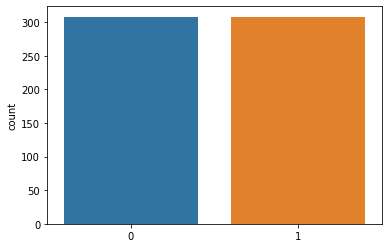

In [7]:
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
#Code starts here
# Create random under sampler object
rus = RandomUnderSampler(random_state=0)
#Undersampling the train data
X_sample2, y_sample2 = rus.fit_sample(X_train, y_train)
sns.countplot(y_sample2)
#Initiating a logistic regression model
model_rus = LogisticRegression(random_state=0)
#Fitting the model with sampled data
model_rus.fit(X_sample2, y_sample2)
#Making prediction of test values
y_pred=model_rus.predict(X_test)
#Finding the accuracy score
accuracy_rus=model_rus.score(X_test,y_test)
print("Accuracy:",accuracy_rus)
#Finding the recall score
recall_rus=recall_score(y_test, y_pred)
print ("recall:",recall_rus)
#Finding the precision score
precision_rus=precision_score(y_test, y_pred)
print ("precision:",precision_rus)
#Finding the f1 score
f1_rus=f1_score(y_test, y_pred)
print ("f1_score:", f1_rus)
#Finding the confusion matrix
confusion_mat_rus=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_rus)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy: 0.9743136037123404
recall: 0.8939393939393939
precision: 0.05139372822299652
f1_score: 0.09719934102141681
Confusion Matrix:
 [[83027  2178]
 [   14   118]]


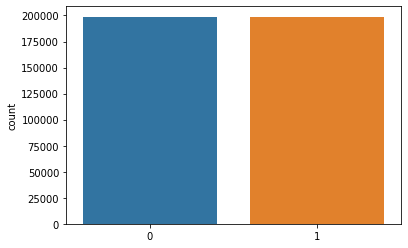

In [9]:
from imblearn.over_sampling import RandomOverSampler
#Code starts here
#Initialising the random over sampler object
ros = RandomOverSampler(random_state=0)
#Sampling the train data using random over sampling method
X_sample5, y_sample5 = ros.fit_sample(X_train, y_train)
sns.countplot(y_sample5)
#Initialising a logistic regression model
model_ros = LogisticRegression(random_state=0)
#Fitting the model with train data
model_ros.fit(X_sample5, y_sample5)
#Making predictions of the train data
y_pred=model_ros.predict(X_test)
#Finding the accuracy score
accuracy_ros=model_ros.score(X_test,y_test)
print("Accuracy:",accuracy_ros)
#Finding the recall score
recall_ros=recall_score(y_test, y_pred)
print ("recall:",recall_ros)
#Finding the precison score
precision_ros=precision_score(y_test, y_pred)
print ("precision:",precision_ros)
#Finding the f1 score
f1_ros=f1_score(y_test, y_pred)
print ("f1_score:", f1_ros)
#Finding the confusion matrix
confusion_mat_ros=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_ros)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Accuracy: 0.975110444473089
recall: 0.8787878787878788
precision: 0.052158273381294966
f1_score: 0.09847198641765706
Confusion Matrix:
 [[83097  2108]
 [   16   116]]


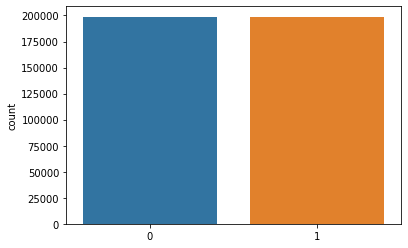

In [10]:
from imblearn.over_sampling import SMOTE
#Code starts here
#Initialising a SMOTE object
smote = SMOTE(random_state=0)
#Sampling the data using SMOTE
X_sample6, y_sample6 = smote.fit_sample(X_train, y_train)
sns.countplot(y_sample6)
#Initialising Logistic Regression model
model_smote = LogisticRegression(random_state=0)
#Fitting the model on train data
model_smote.fit(X_sample6, y_sample6)
#Making predictions on test data
y_pred=model_smote.predict(X_test)
#Finding the accuracy score
accuracy_smote=model_smote.score(X_test,y_test)
print("Accuracy:",accuracy_smote)
#Finding the recall score
recall_smote=recall_score(y_test, y_pred)
print ("recall:",recall_smote)
#Finding the precision score
precision_smote=precision_score(y_test, y_pred)
print ("precision:",precision_smote)
#Finding the f1 score
f1_smote=f1_score(y_test, y_pred)
print ("f1_score:", f1_smote)
#Finding the confusion matrix
confusion_mat_smote=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",confusion_mat_smote)

In [12]:
data1 = pd.read_csv('/content/drive/MyDrive/TEST.csv')
data1.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,1.755477,-0.860198,-1.629185,0.164162,0.027778,-0.330613,0.216770,-0.215280,1.187584,-0.291611,-1.883296,0.107464,-0.180398,0.138906,-0.105876,-0.229330,-0.401810,-0.330877,0.620971,0.135129,-0.122173,-0.503867,-0.063954,-1.047319,-0.016514,-0.039022,-0.058861,-0.035955,186.76
1,1,-0.706506,1.155627,1.132585,2.742101,1.203095,0.013641,1.200743,-0.273633,-1.323403,1.138185,-1.275816,-1.087457,-0.936612,-0.041733,-1.153523,0.551025,-0.829644,-0.069660,-1.874384,-0.281283,0.352723,1.142657,-0.156382,1.139391,-0.151635,0.063306,-0.284146,-0.015198,21.18
2,2,1.043717,-0.928666,0.643312,-2.093695,-0.527878,1.420413,-1.053914,0.702897,2.450726,-1.767777,2.057099,2.184425,-0.470463,-0.016315,1.027377,-2.374469,1.332018,-1.536175,0.206623,-0.264045,0.008873,0.568767,0.070359,-0.978165,0.258814,-0.726163,0.176843,0.005530,1.00
3,3,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,-7.524368,2.954344,-7.099825,1.520369,-7.687803,-0.225002,-8.520850,-13.277300,-5.253705,3.623332,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46
4,4,1.187587,0.173589,0.104741,1.143172,0.164552,0.162763,0.097302,0.001023,-0.013501,0.060962,0.318420,1.224034,0.632704,0.053400,-1.059099,-0.023212,-0.603919,0.155364,0.580959,-0.039666,-0.112873,-0.163529,-0.231334,-0.469322,0.832111,-0.312343,0.019521,0.005464,27.00


In [13]:
test_data = data1.iloc[:,1:29]
print(test_data.shape)

(352, 28)


In [14]:
results = model_smote.predict(test_data)
print(results)

[0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [16]:
final = pd.DataFrame(results)
print(final.shape)
final.to_csv('output.csv',index=True)

(352, 1)
